## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-2 Короткова Вера Владимировна__

Вариант: __53__

    

In [154]:
import pandas as pd
import json
from bs4 import BeautifulSoup
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xlsxwriter

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр, которые стоят (без скидки) более 40\$. В файле `steam_games.xml` находится информация об играх из магазина Steam. При помощи пакета `bs4` считайте файл. Выведите на экран количество игр, скидка на которые была больше 20\$.

In [155]:
with open(
    "steam_games.json",
    "r",
    encoding="utf-8"
) as fp:
    steam_games_json = json.load(fp)

In [156]:
game_count = 0
for game in steam_games_json:
    if type(game['original_price']) != float:
        if float(game['original_price'].split('$')[1]) > 40:
            game_count += 1
game_count

386

In [157]:
with open(
    "steam_games.xml",
    "r",
    encoding="utf-8"
) as fp:
    steam_games_xml = BeautifulSoup(fp)

In [158]:
games = steam_games_xml.find_all('game')

In [159]:
game_count_1 = 0
for game in games:
    if (game.find('original_price')['type'] != 'float') and (game.find('discount_price')['type'] != 'float'):
        if (float(game.find('original_price').text.split('$')[1]) - float(game.find('discount_price').text.split('$')[1])) > 20:
            game_count_1 += 1
game_count_1

279

__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Пересортируйте столбцы таблицы в порядке возрастания количества уникальных элементов в столбце. Столбцы, содержащие списковые значения (если они имеются), поместите последними.

In [160]:
games_df = pd.DataFrame(steam_games_json)

In [161]:
games_df = games_df.drop(games_df.columns[100*games_df.isna().sum()/games_df.shape[0] > 65], axis = 1)

In [162]:
games_dict_1 = {}
for column in games_df.columns[~(games_df.applymap(type) == list).any()]:
    games_dict_1[column] = len(games_df[column].value_counts())
games_dict_1 = dict(sorted(games_dict_1.items(), key=lambda item: item[1]))

games_dict_2 = {}
for column in games_df.columns[(games_df.applymap(type) == list).any()]:
    games_dict_2[column] = len(games_df[column].value_counts())
games_dict_2 = dict(sorted(games_dict_2.items(), key=lambda item: item[1]))

print(games_dict_1)
print(games_dict_2)

{'types': 3, 'reviews_mood': 5, 'avg_rating_users': 100, 'avg_rating_critics': 100, 'original_price': 267, 'selled': 1152, 'discount_price': 1378, 'release_date': 2350, 'recommended_requirements': 3784, 'minimum_requirements': 4014, 'publisher': 5078, 'developer': 6045, 'desc_snippet': 6750, 'reviews_cnt': 7847, 'game_description': 9226, 'name': 9991, 'url': 10000}
{'genres': 862, 'game_details': 2385, 'languages': 3504, 'popular_tags': 5744}


In [163]:
new_columns = []
for column in games_dict_1:
    new_columns.append(column)
for column in games_dict_2:
    new_columns.append(column)

In [164]:
games_df = games_df[new_columns]
games_df

,types,reviews_mood,avg_rating_users,avg_rating_critics,original_price,selled,discount_price,release_date,recommended_requirements,minimum_requirements,...,developer,desc_snippet,reviews_cnt,game_description,name,url,genres,game_details,languages,popular_tags
0,app,positive,77,63,$3.99,1189.0,$3.19,"Nov 3, 2018","Recommended:,OS:,Windows Xp / Vista / 7,Proces...","Minimum:,OS:,Windows Xp / Vista / 7,Processor:...",...,Erik Sheader-Smith,A surreal post-life adventure,6952,About This Game All sales of this game will ...,The Endless Empty,https://store.steampowered.com/app/959410/The_...,"[Adventure, Indie, RPG]","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]","[Adventure, RPG, Indie, RPGMaker, Story Rich, ..."
1,app,very negative,94,49,$14.99,100.0,NaN,"Apr 22, 2019","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...","Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...",...,Ant.Karlov,"Fight to survive on a mysterious alien planet,...",5115,About This Game A brand new entry to the Zomb...,Zombotron,https://store.steampowered.com/app/664830/Zomb...,"[Action, Adventure, Indie]","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...","[Action, Adventure, Indie, 2D, Zombies, Single..."
2,app,negative,58,98,$14.99,100.0,$80.17,"Aug 22, 2016",NaN,NaN,...,Lion's Shade,Tempest is a Pirate Open World Action RPG wher...,1266,About This Game Game Features Always somethi...,Tempest: Pirate Action RPG,https://store.steampowered.com/app/418180/Temp...,"[Action, Indie, RPG]","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...","[Pirates, Naval, Action, Open World, RPG, Sing..."
3,app,very positive,51,87,$9.99,559.0,NaN,"Jun 3, 2016","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...","Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...",...,"SmiteWorks USA, LLC",NaN,12492,About This Content A tale of power and corru...,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,https://store.steampowered.com/app/484940/Fant...,"[Indie, RPG, Strategy]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]","[Strategy, RPG, Indie]"
4,bundle,neutral,80,27,NaN,NaN,$120.71,NaN,NaN,NaN,...,KT Racing,WRC Collection bundle,8573,NaN,WRC Collection,https://store.steampowered.com/bundle/5044/WRC...,[Racing],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,bundle,negative,1,50,$41.98,100.0,$32.16,NaN,NaN,NaN,...,Ghost Town Games Ltd.,Overcooked! 1 & 2 Bundle bundle,4310,NaN,Overcooked! 1 & 2 Bundle,https://store.steampowered.com/bundle/8017/Ove...,"[Action, Casual, Indie, Simulation]","[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",[]
9996,app,very negative,22,90,$4.99,1088.0,NaN,"Feb 8, 2016","Recommended:,Graphics:,Laptop versions of thes...","Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...",...,Skyhook Games,NaN,9512,About This Content A relative rarity by coal ...,TS Marketplace: GWR 40t Coal Wagon Pack,https://store.steampowered.com/app/326027/TS_M...,[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",[Simulation]
9997,app,very positive,7,0,$0.99,1454.0,$14.72,"Nov 1, 2018","Recommended:,Requires a 64-bit processor and o...","Minimum:,Requires a 64-bit processor and opera...",...,"KOEI TECMO GAMES CO., LTD.",NaN,16437,About This Content Legendary weapons for your...,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,https://store.steampowered.com/app/933550/WARR...,[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",[Action]
9998,app,very negative,68,22,$2.99,1257.0,$150.02,"Jul 19, 2018",NaN,NaN,...,Hosted Games,Visit a myth-infested 1820s Ireland. One dark ...,1577,About This Game V

__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [165]:
ratings_np = games_df[['avg_rating_users', 'avg_rating_critics']].to_numpy()

In [166]:
sum_uc = np.transpose([ratings_np[:, 0]]) + ratings_np[:,1]
sum_uc

array([[140, 126, 175, ...,  77,  99, 109],
       [157, 143, 192, ...,  94, 116, 126],
       [121, 107, 156, ...,  58,  80,  90],
       ...,
       [ 70,  56, 105, ...,   7,  29,  39],
       [131, 117, 166, ...,  68,  90, 100],
       [ 64,  50,  99, ...,   1,  23,  33]], dtype=int64)

In [167]:
i, j  = np.where(sum_uc == 131)
print(i[0], j[0])
print(ratings_np[i[0], 0], ratings_np[j[0], 1])

0 98
77 54


__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Постройте график ядерной оценки плотности этого столбца. Сделайте цвет графика зеленым, добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите вертикальную линию от точки глобального максимума построенной функции до оси $y=0$. Сделайте эту вертикальную линию зеленой и пунктирной и укажите толщину линии 0.5. 

* Примечание: точку глобального максимума разрешается определить визуально на основе графика или численно, воспользовавшись функцией для построения оценки, например [вот этой](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde).

In [168]:
def last(x):
    return x[-1]

games_df['original_price'] = games_df['original_price'][games_df['original_price'].apply(lambda x: type(x)) == str].str.split('$').apply(last).astype('float')

In [169]:
games_df = games_df[games_df['original_price'] <= games_df['original_price'].quantile(q = 0.75)]

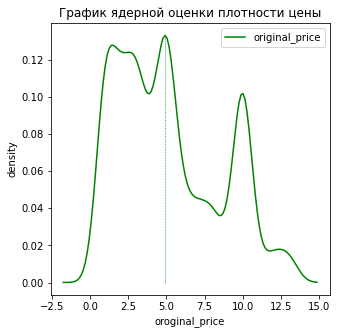

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
graph = sns.kdeplot(games_df['original_price'], color = 'g', ax=ax)
ax.set_xlabel('oroginal_price')
ax.set_ylabel('density')
ax.set_title('График ядерной оценки плотности цены')

xy_data = np.array(graph.lines[0].get_xydata())
max_x = xy_data[xy_data[:, 1] == xy_data[:, 1].max()][0][0]
max_y = xy_data[xy_data[:, 1] == xy_data[:, 1].max()][0][1]

ax.vlines(max_x, ymin = 0, ymax = max_y, color='g', linewidth = 0.5, linestyle = 'dashed')

__Задание 5__. Для каждого сниппета описания из столбца `desc_snippet` таблицы `games_df` выясните, какие в нем содержатся части речи. Добавьте к фрейму столбец `n_pos`, в котором указано количество различных частей речи, присутствующих в сниппете. 

In [171]:
def pos_func(snippet):
    tokenizer = nltk.tokenize.RegexpTokenizer((r"[a-zA-Z]+'?[a-zA-Z]*"))
    words = tokenizer.tokenize(str(snippet))
    return len(set(list(map(lambda x: x[1], nltk.pos_tag(words)))))

games_df['n_pos'] = games_df['desc_snippet'].apply(pos_func)

<ipython-input-171-bcad2a235e95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['n_pos'] = games_df['desc_snippet'].apply(pos_func)


In [172]:
games_df['n_pos']

0        3
3        1
7       10
10       1
11       1
        ..
9992     1
9996     1
9997     1
9998    16
9999    17
Name: n_pos, Length: 6062, dtype: int64

__Задание 6__. Пересортируйте столбцы таблицы `games_df` по следующему правилу: сначала идут нечисловые столбцы, за ними идут числовые столбцы. Добавьте перед первым числовым столбцом пустой безымянный столбец. Сохраните текущее состояние `games_df` в рабочую книгу "games.xlsx". При помощи механизма группировки столбцов, который предоставляет Excel, создайте 2 группы столбцов: группу нечисловых столбцов и группу числовых столбцов.
Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание 1: в интерфейсе Excel механизм группировки находится в разделе "Структура" на вкладке "Данные". Пустой столбец нужен для того, чтобы группы столбцов не сливались в одну.
* Примечание 2: вам может потребоваться преобразовать номер столбца в букву. Для этих целей можно воспользоваться функцией `xlsxwriter.utility.xl_col_to_name`.

In [173]:
column_types = games_df.dtypes

In [174]:
new_columns = list(column_types[column_types == 'object'].keys()) + list(column_types[column_types == 'float64'].keys()) + list(column_types[column_types == 'int64'].keys())


In [175]:
games_df = games_df[new_columns]

new_column_index = len(list(column_types[column_types == 'object'].keys()))

games_df.insert(new_column_index, '','')

In [176]:
writer = pd.ExcelWriter('games.xlsx')
games_df.to_excel(writer)

In [177]:
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

worksheet.set_column(1, new_column_index, None, None,  {'level': 1})
worksheet.set_column(new_column_index+2, len(games_df.columns), None, None, {'level': 1})

workbook.close()

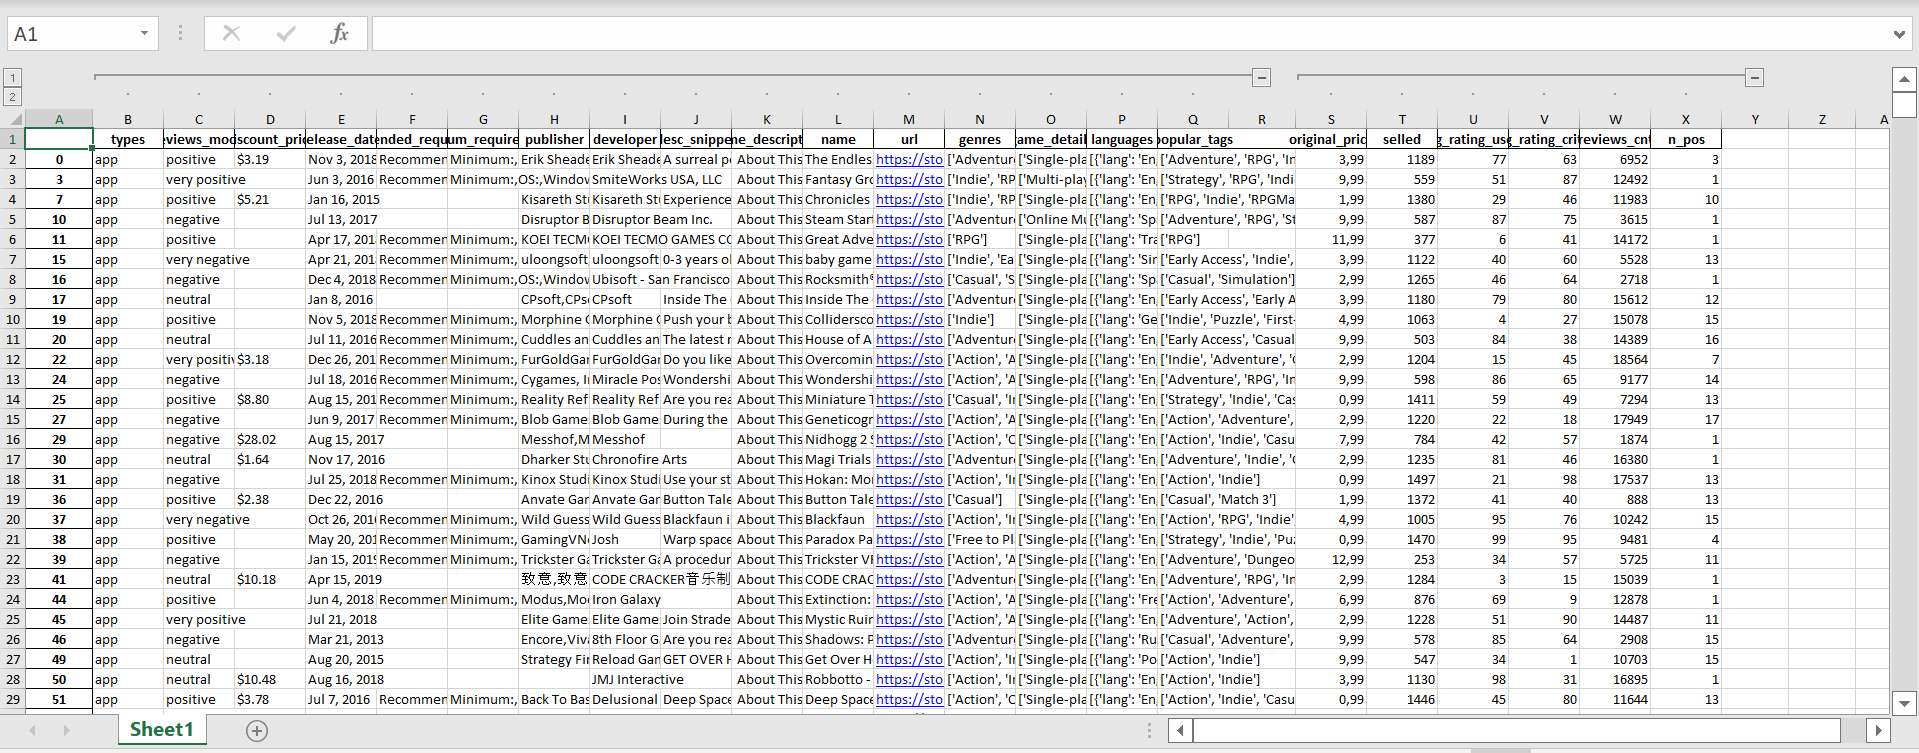